# Sales Analysis 

<H4> Import necessary libraries </H4>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ratan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('supermarket_sales - sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Converting the columns into correct data types:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
# Additional columns:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
# Since the 'gross income' column value is based on '5%' of 'gross margin percentage' instead of '4.761905':
df['income'] = (df['gross margin percentage']*df['cogs'])/100

In [7]:
# droping "gross income" column:

df = df.drop(['gross income'], axis=1)


In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating,year,month,income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,9.1,2019,1,24.896667
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,9.6,2019,3,3.638095
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,7.4,2019,3,15.443333
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,8.4,2019,1,22.179048
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,5.3,2019,2,28.770000


# Data Exploration: 
Question 1: What was the best month for sales? What was the Income & quantity sold in that month?

In [9]:
df_month = df[['Quantity','Total', 'cogs','month','income']]

In [10]:
df_month = df_month.groupby(['month']).sum()

In [11]:
df_month

,Quantity,Total,cogs,income
month,,,,
1,1965,116291.868,110754.16,5274.007619
2,1654,97219.374,92589.88,4409.041905
3,1891,109455.507,104243.34,4963.968572


Text(0.5, 0, 'Month')

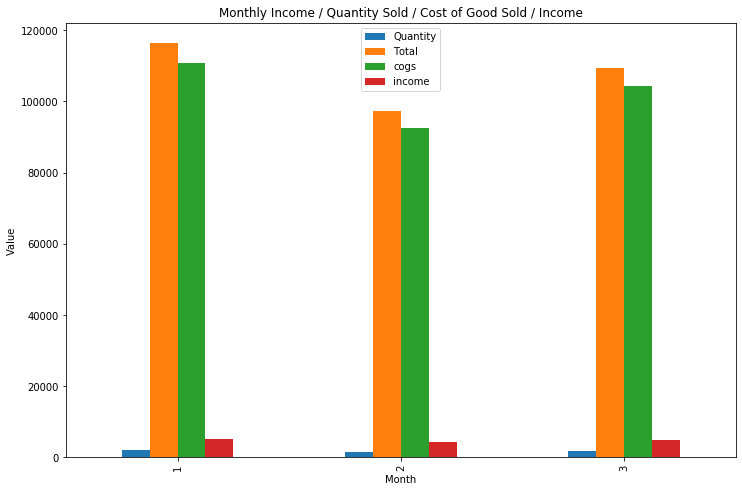

In [12]:
df_month.plot(legend= True, kind='bar', title="Monthly Income / Quantity Sold / Cost of Good Sold / Income", figsize=(12,8))
plt.ylabel('Value')
plt.xlabel('Month')

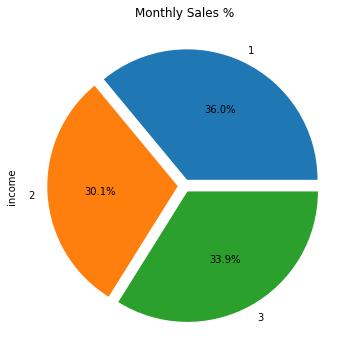

In [13]:
df_monthly_income = df_month['income']
explode = [0.05,0.05,0.05]

df_monthly_income.plot.pie(autopct="%.1f%%", title="Monthly Sales %", figsize=(10,6), explode=explode)

Question 2: What City and Branch sold the most product?

In [14]:
df_Sales = df[['Branch','City','Quantity','income']]
df_sales_branch = df_Sales.groupby(['Branch']).sum()
df_sales_city = df_Sales.groupby(['City']).sum()

In [15]:
df_sales_branch

,Quantity,income
Branch,,
A,1859,4816.343333
B,1820,4816.220952
C,1831,5014.453810


Text(0.5, 0, 'Store Branch')

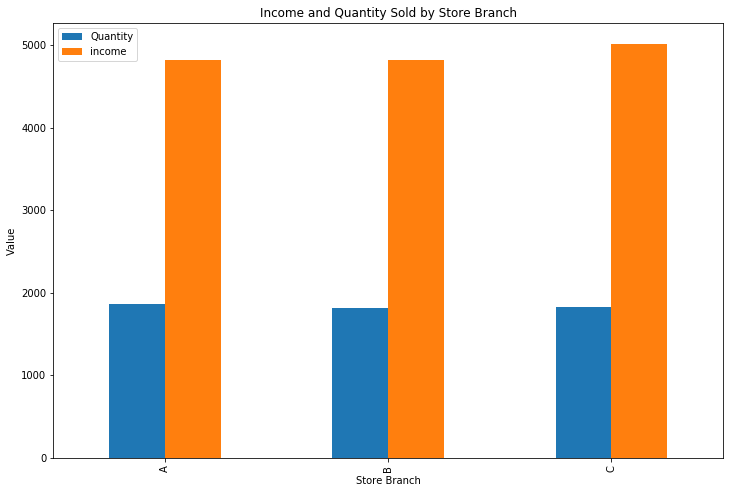

In [16]:
df_sales_branch.plot(legend= True, kind='bar', title="Income and Quantity Sold by Store Branch", figsize=(12,8))
plt.ylabel('Value')
plt.xlabel('Store Branch')

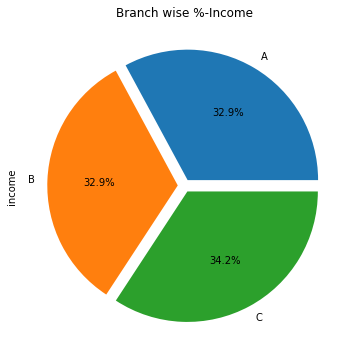

In [17]:
df_sales_branch = df_sales_branch['income']
explode = [0.05,0.05,0.05]

df_sales_branch.plot.pie(autopct="%.1f%%", title="Branch wise %-Income", figsize=(10,6), explode=explode)

In [18]:
df_sales_city

,Quantity,income
City,,
Mandalay,1820,4816.220952
Naypyitaw,1831,5014.453810
Yangon,1859,4816.343333


Text(0.5, 0, 'City')

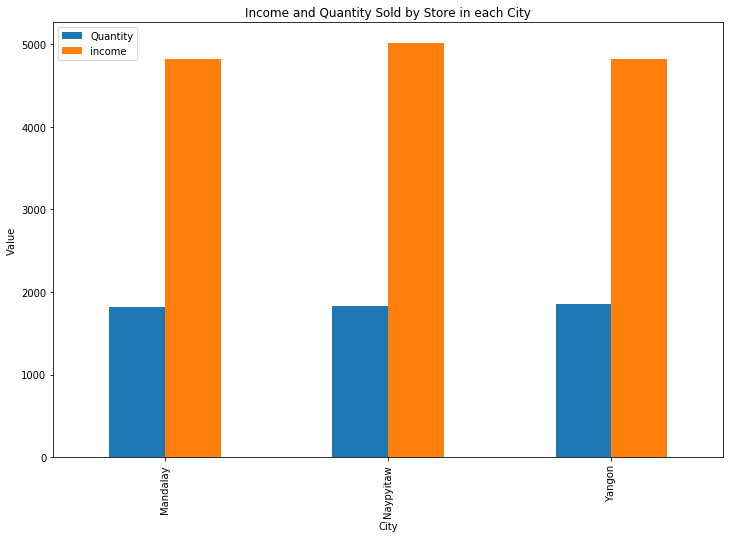

In [19]:
df_sales_city.plot(legend= True, kind='bar', title="Income and Quantity Sold by Store in each City", figsize=(12,8))
plt.ylabel('Value')
plt.xlabel('City')

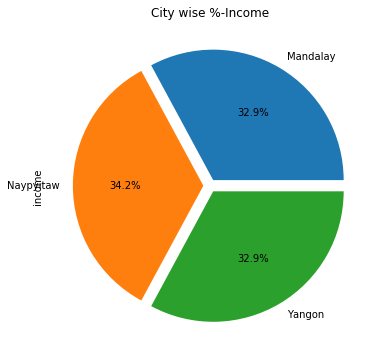

In [20]:
df_sales_city = df_sales_city['income']
explode = [0.05,0.05,0.05]

df_sales_city.plot.pie(autopct="%.1f%%", title="City wise %-Income", figsize=(10,6), explode=explode)

Question 3: What products line are mostly sold ?

In [21]:
df_product = df[['Product line','Quantity','income']]

In [22]:
df_product = df_product.groupby(['Product line']).sum()

In [23]:
df_product

,Quantity,income
Product line,,
Electronic accessories,971,2464.287143
Fashion accessories,902,2462.852381
Food and beverages,952,2546.251429
Health and beauty,854,2231.008571
Home and lifestyle,911,2442.717143
Sports and travel,920,2499.901429


Text(0.5, 0, 'Product Line')

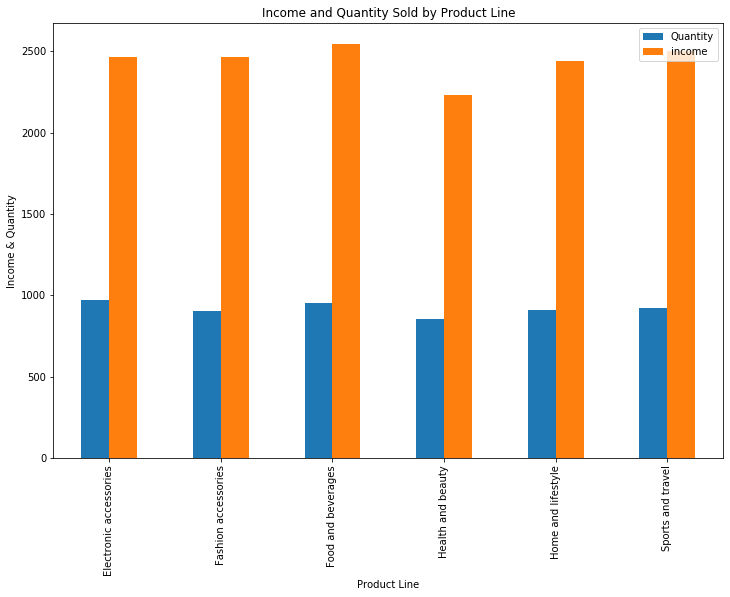

In [24]:
df_product.plot(legend= True, kind='bar', title="Income and Quantity Sold by Product Line", figsize=(12,8))
plt.ylabel('Income & Quantity')
plt.xlabel('Product Line')

Question 4: What products line brought most income and sold most quantity comparable to average price of the product line ?

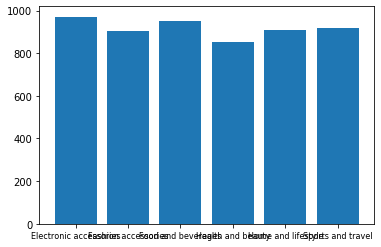

In [25]:
product_group = df.groupby(['Product line'])

quantity_ordered = product_group.sum()['Quantity']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, size=8)
plt.show()

C:\Users\ratan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


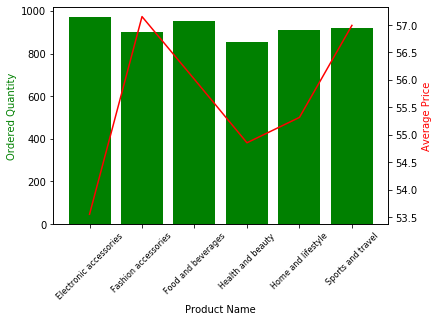

In [26]:
prices = df.groupby('Product line').mean()['Unit price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Ordered Quantity', color='g')
ax2.set_ylabel('Average Price', color='r')
ax1.set_xticklabels(keys, rotation=45, size=8)

fig.show()


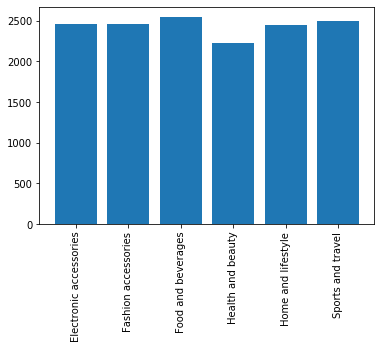

In [27]:
income_ordered = product_group.sum()['income']

keys = [pair for pair, df in product_group]
plt.bar(keys, income_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

C:\Users\ratan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


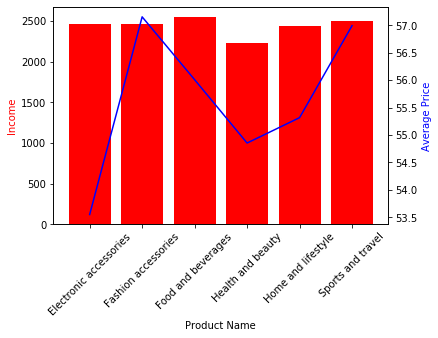

In [28]:
prices = df.groupby('Product line').mean()['Unit price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, income_ordered, color='r')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Income', color='r')
ax2.set_ylabel('Average Price', color='b')
ax1.set_xticklabels(keys, rotation=45, size=10)

fig.show()


Question 5: Which gender are most shopaholic ?

In [29]:
df_gender = df.groupby(['Gender']).sum()[['Quantity','cogs','income']]

In [30]:
df_gender

,Quantity,cogs,income
Gender,,,
Female,2869,159888.50,7613.738095
Male,2641,147698.88,7033.280000


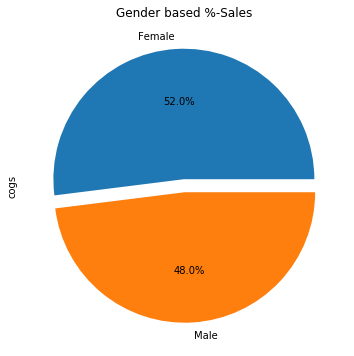

In [31]:
df_gender = df_gender['cogs']
explode = [0.05,0.05]

df_gender.plot.pie(autopct="%.1f%%", title="Gender based %-Sales", figsize=(10,6), explode=explode)

Question 6: Does most satisfied customer's spend more?

Text(0, 0.5, 'Occurrence rate (%)')

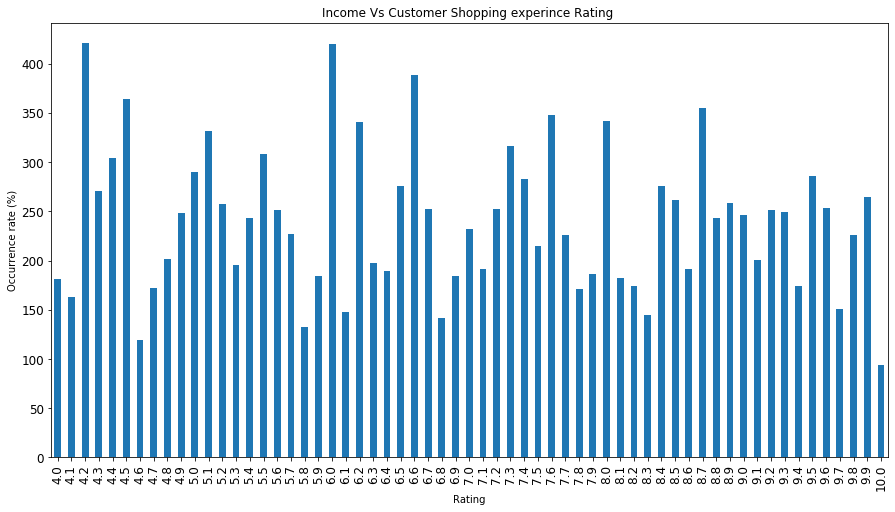

In [32]:
df_rating = df.groupby(['Rating']).sum()['income']
df_rating.plot(kind='bar',title="Income Vs Customer Shopping experince Rating ", figsize=(15,8), fontsize=12)
plt.ylabel('Occurrence rate (%)')

Question 7: What payment type is mostly used?

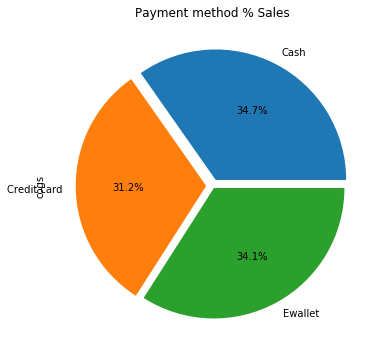

In [33]:
df_payment = df.groupby(['Payment']).sum()['cogs']
explode = [0.05,0.05,0.02]

df_payment.plot.pie(autopct="%.1f%%", title="Payment method % Sales", figsize=(10,6), explode=explode)

Question 8: Finding the correlation between the attributes

In [34]:
# For Creating labelEncoder: So the categorical varibales can be converted into Binary
# Import LabelEncoder:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [35]:
df['Branch']=le.fit_transform(df['Branch'])
df['City']=le.fit_transform(df['City'])
df['Customer type']=le.fit_transform(df['Customer type'])
df['Gender']=le.fit_transform(df['Gender'])
df['Product line']=le.fit_transform(df['Product line'])
df['Payment']=le.fit_transform(df['Payment'])


In [36]:
correlation =df.corr()

labels = ['Branch', 'City', 'Customer type', 'Gender',
          'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
          'Payment', 'cogs', 'gross margin percentage', 'Rating', 'year',
          'month', 'income']

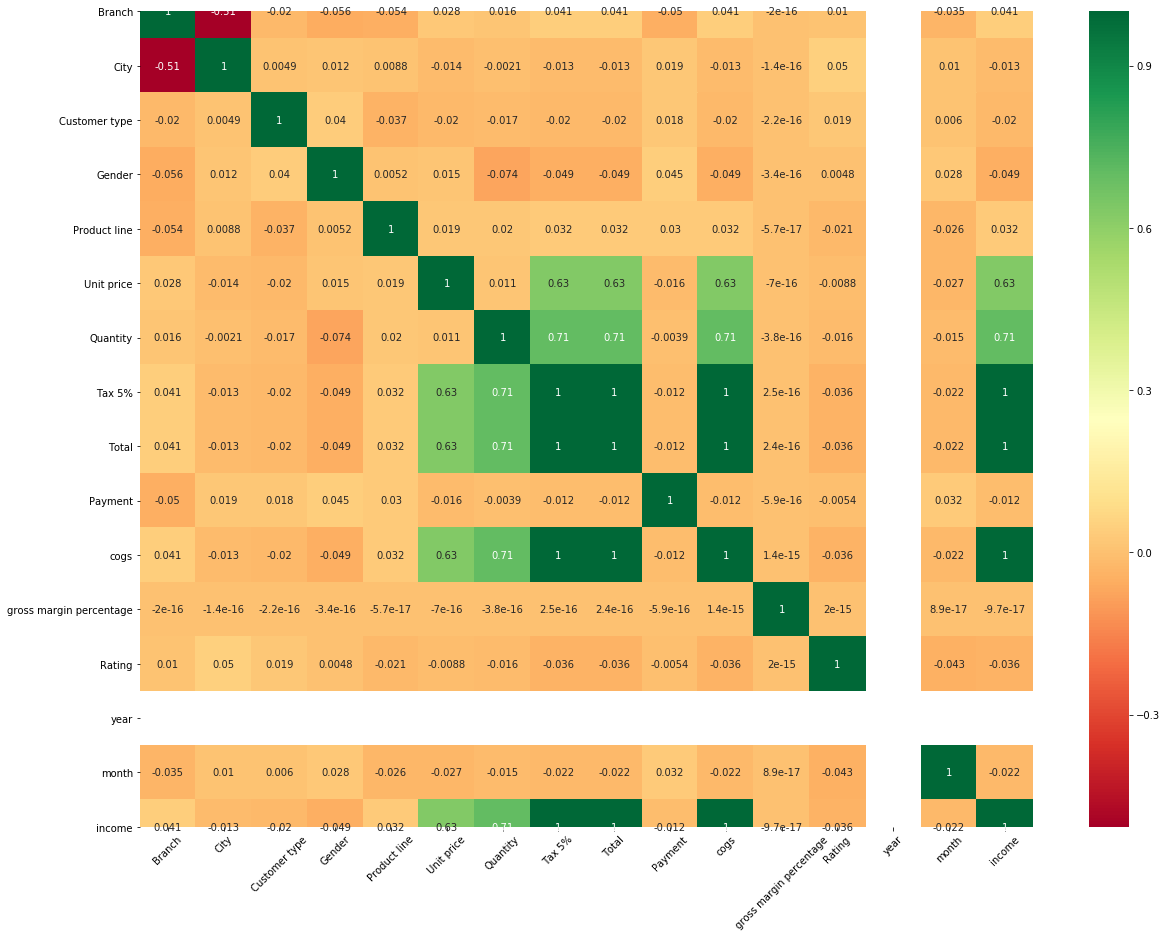

In [37]:
# Plotting the correlation matrix on a heatmap
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap="RdYlGn")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()